## Air Quality Data Analysis

### Introduction

This project analyzes air quality data to understand pollution levels and their impact on health and the environment. The study involves examining various pollutants, trends, and correlations with environmental factors.

#### Importing all the neccessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

### Dataset

#### Features:
- PM2.5 and PM10 levels (particulate matter)
- CO, NO2, SO2, and O3 concentrations
- Temperature, humidity, and wind speed

In [5]:
df = pd.read_csv('air quality data.csv')
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0


In [6]:
df.head(10)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN
5,Ahmedabad,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN
6,Ahmedabad,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN
7,Ahmedabad,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN
8,Ahmedabad,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN
9,Ahmedabad,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN


In [7]:
df.tail()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0
29530,Visakhapatnam,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0


In [8]:
df.shape

(29531, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     29531 non-null  object 
 1   PM2.5    24933 non-null  float64
 2   PM10     18391 non-null  float64
 3   NO       25949 non-null  float64
 4   NO2      25946 non-null  float64
 5   NOx      25346 non-null  float64
 6   NH3      19203 non-null  float64
 7   CO       27472 non-null  float64
 8   SO2      25677 non-null  float64
 9   O3       25509 non-null  float64
 10  Benzene  23908 non-null  float64
 11  Toluene  21490 non-null  float64
 12  Xylene   11422 non-null  float64
 13  AQI      24850 non-null  float64
dtypes: float64(13), object(1)
memory usage: 3.2+ MB


In [10]:
df.isnull().sum()

City           0
PM2.5       4598
PM10       11140
NO          3582
NO2         3585
NOx         4185
NH3        10328
CO          2059
SO2         3854
O3          4022
Benzene     5623
Toluene     8041
Xylene     18109
AQI         4681
dtype: int64

In [11]:
df.isnull().sum().sum()

83807

In [12]:
df.duplicated().sum()

2297

In [13]:
#droping the rows where AQI has missing values
df1 = df.dropna(subset=['AQI'],inplace=True)

In [14]:
df.isnull().sum().sort_values(ascending=False)

Xylene     15372
PM10        7086
NH3         6536
Toluene     5826
Benzene     3535
NOx         1857
O3           807
PM2.5        678
SO2          605
CO           445
NO2          391
NO           387
City           0
AQI            0
dtype: int64

In [15]:
df.shape

(24850, 14)

### Data Preprocessing

- Handling missing values
- Normalizing pollutant concentrations
- Encoding categorical data if necessary
- Splitting into training and test sets for predictive modeling

In [16]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
null_values_percentage

Xylene     61.859155
PM10       28.515091
NH3        26.301811
Toluene    23.444668
Benzene    14.225352
NOx         7.472837
O3          3.247485
PM2.5       2.728370
SO2         2.434608
CO          1.790744
NO2         1.573441
NO          1.557344
City        0.000000
AQI         0.000000
dtype: float64

### Data exploration using visualization EDA
### Analysis & Visualization
- Time-series trends of air pollution
- Correlation between pollutants and weather conditions
- Heatmaps to show pollution distribution across regions
#### Univariate analysis for each feature

In [17]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

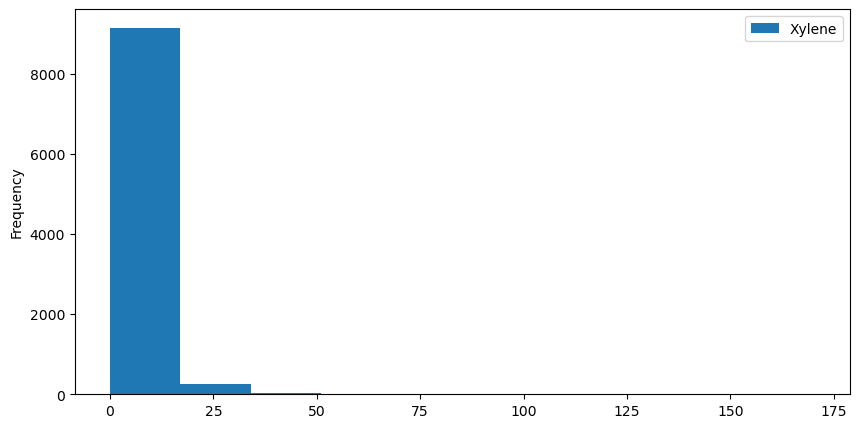

In [18]:
df['Xylene'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

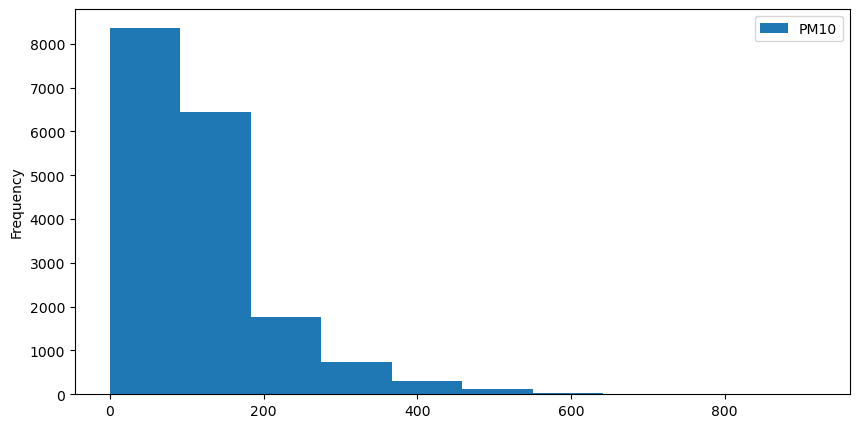

In [19]:
df['PM10'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

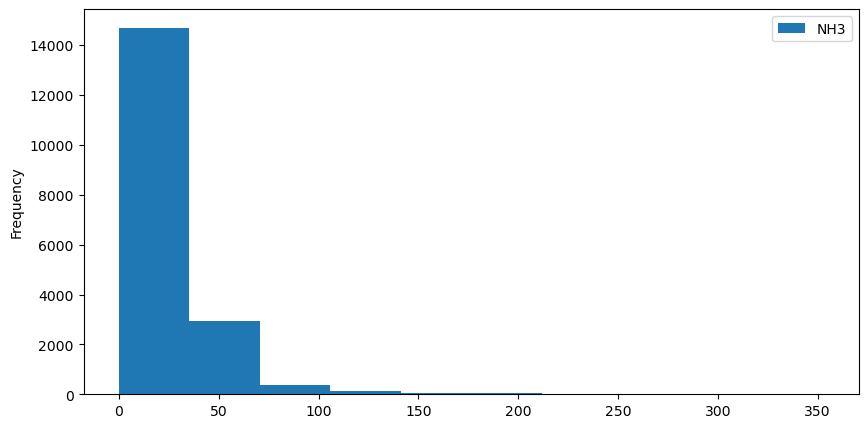

In [20]:
df['NH3'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

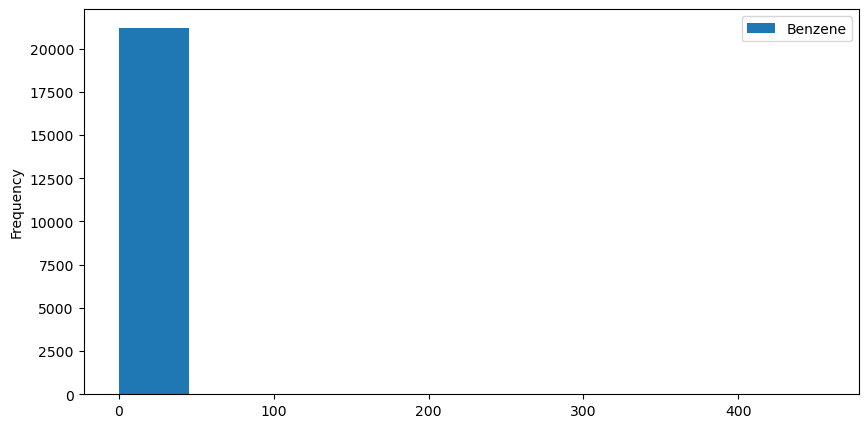

In [21]:
df['Benzene'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

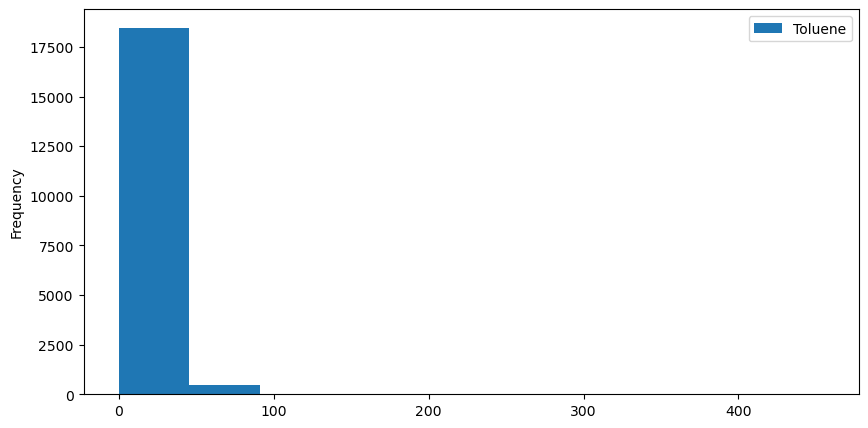

In [22]:
df['Toluene'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

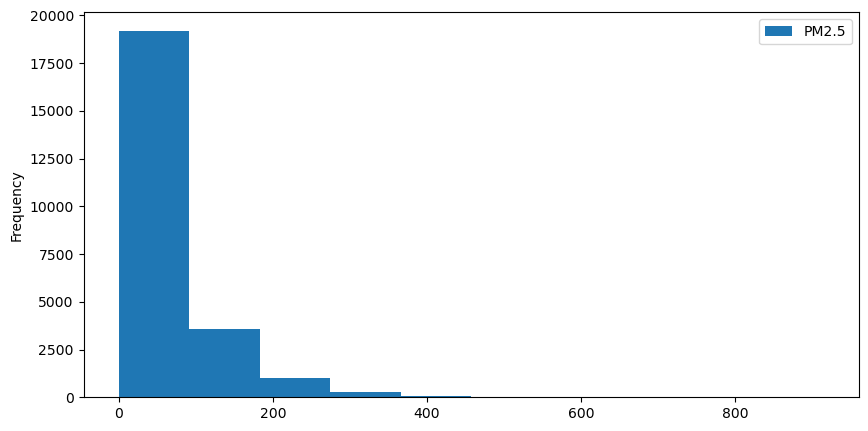

In [23]:
df['PM2.5'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

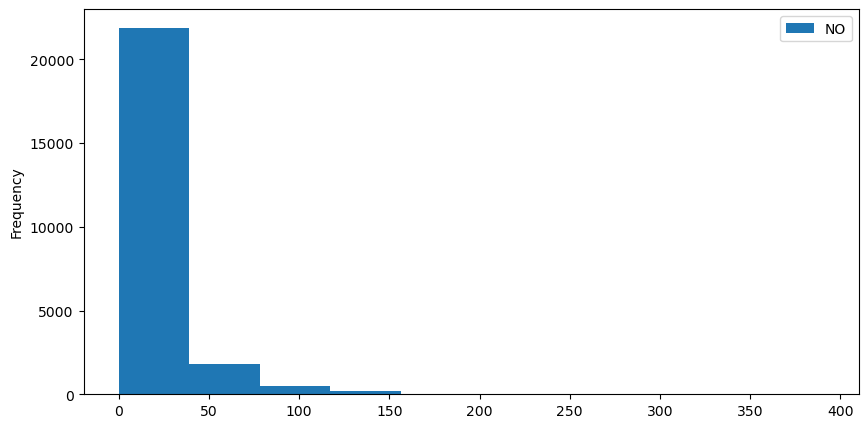

In [24]:
df['NO'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

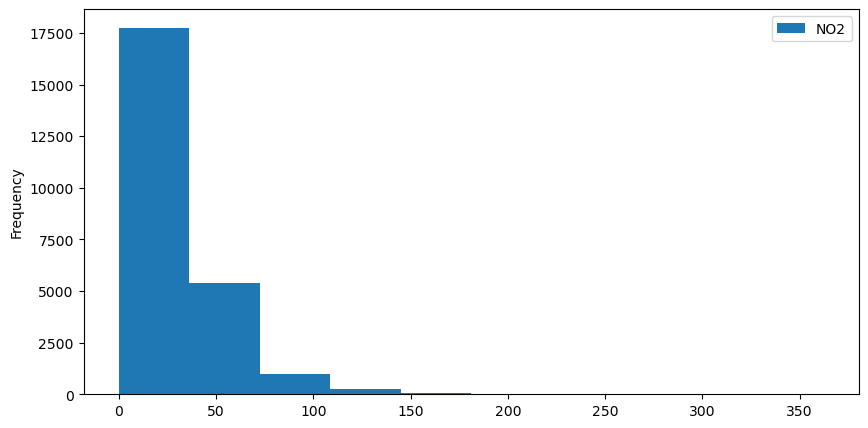

In [25]:
df['NO2'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

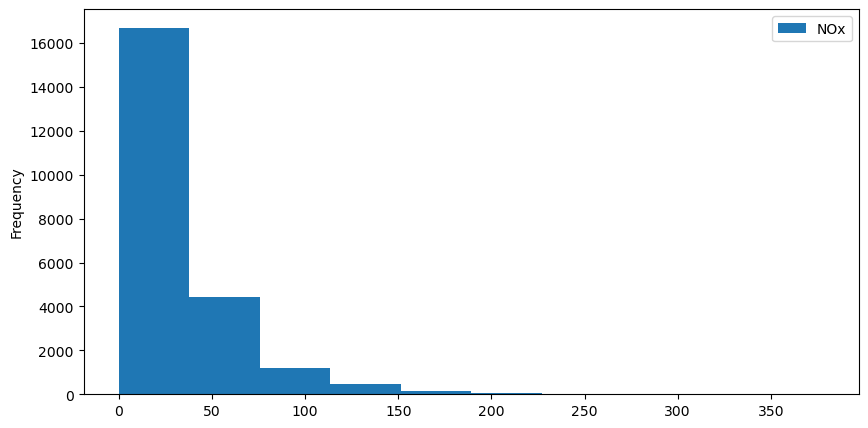

In [26]:
df['NOx'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

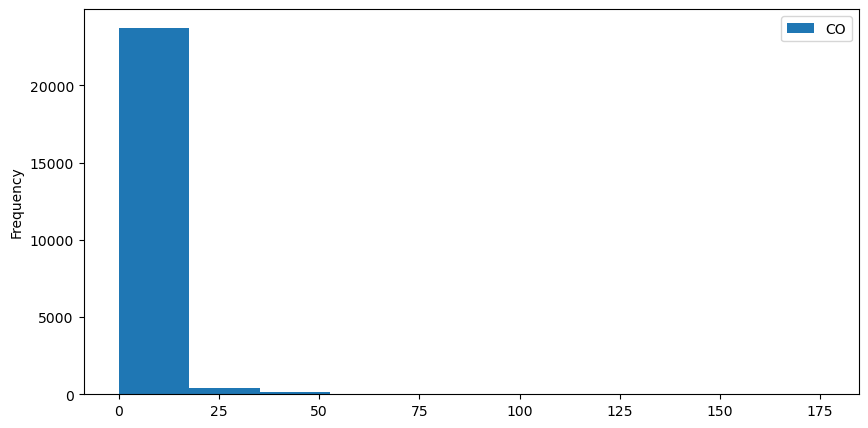

In [27]:
df['CO'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

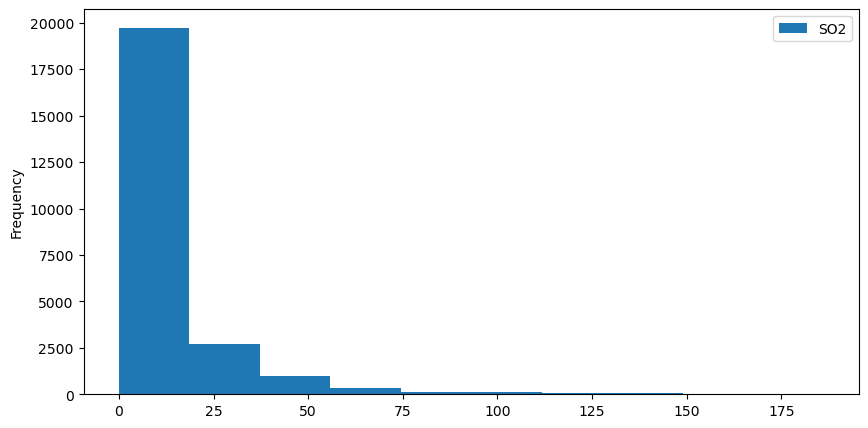

In [28]:
df['SO2'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

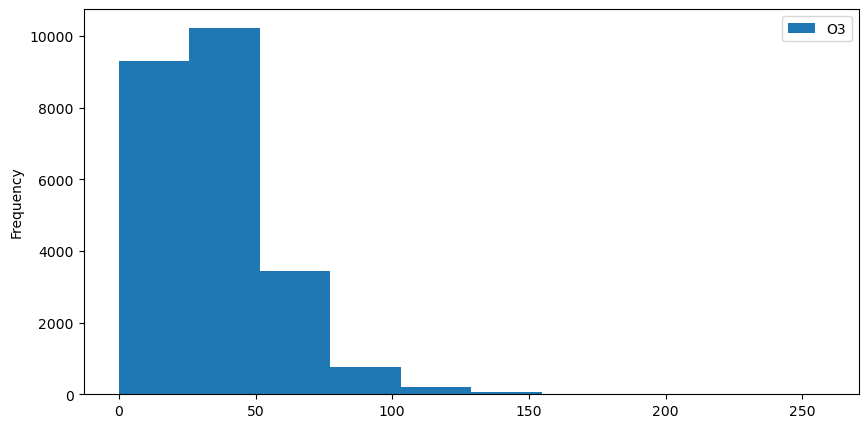

In [29]:
df['O3'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

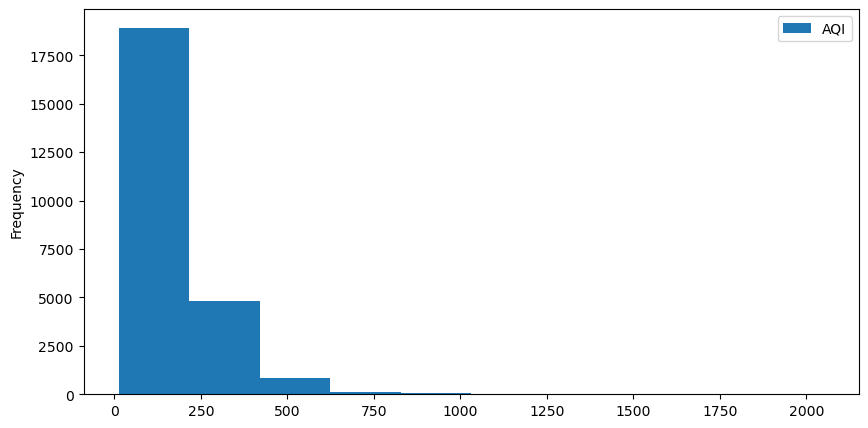

In [30]:
df['AQI'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

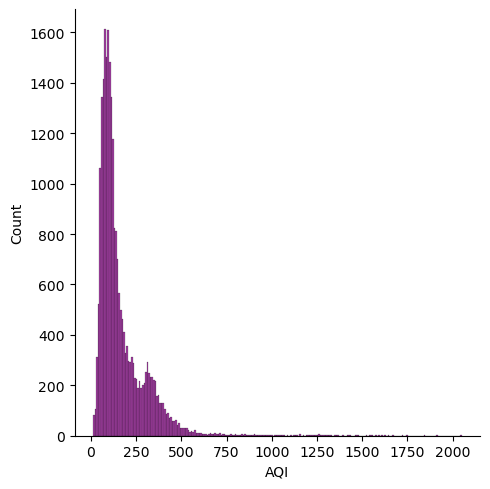

In [31]:
#distribution of aqi from 2012-2020
sns.displot(df, x='AQI', color='purple')
plt.show()

#### Bivariate analysis for each feature

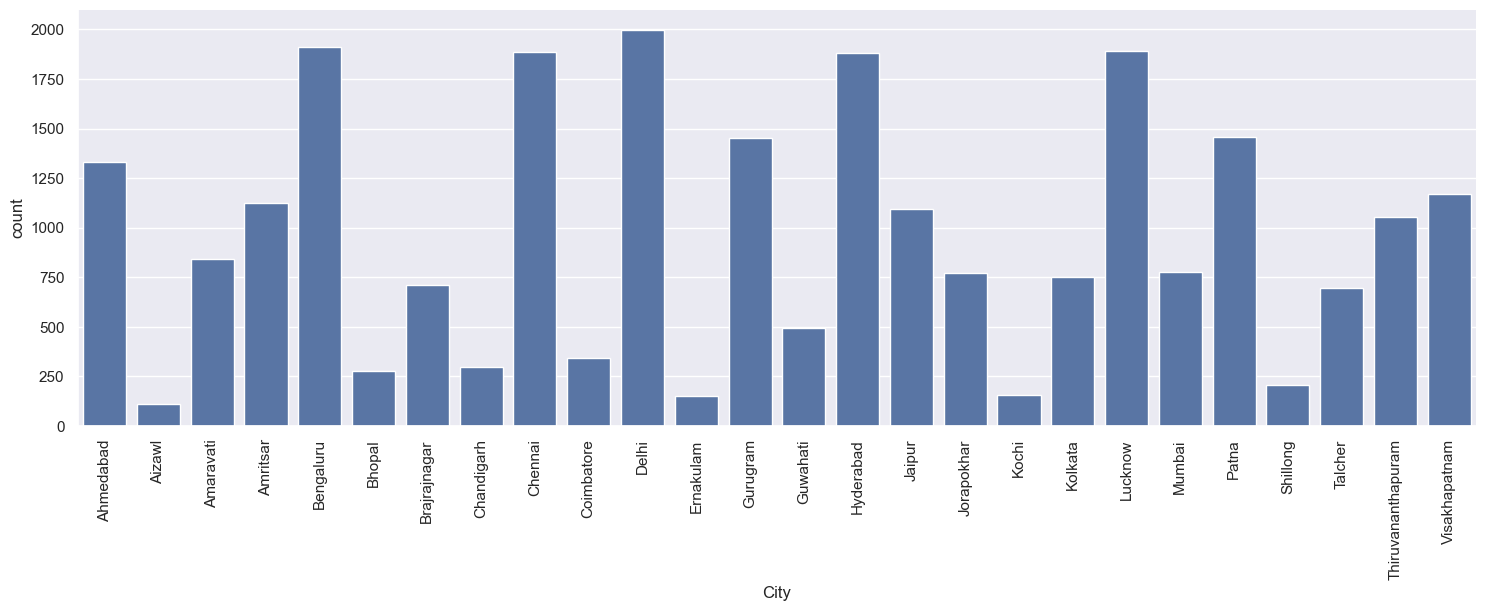

In [32]:
sns.set(style='darkgrid')
graph = sns.catplot(x='City', kind='count', data=df, height=5, aspect=3)
graph.set_xticklabels(rotation=90)

In [33]:
df.describe().loc["mean"]

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [34]:
df.describe().loc["std"]

PM2.5       63.075398
PM10        89.487976
NO          22.421138
NO2         24.627054
NOx         30.712855
NH3         25.875981
CO           7.075208
SO2         17.428693
O3          21.724525
Benzene     16.036020
Toluene     20.881085
Xylene       6.754324
AQI        140.696585
Name: std, dtype: float64

In [35]:
df = df.replace({
    'PM2.5' : {np.nan:67.476613}, 
    'PM10' : {np.nan:118.454435}, 
    'NO' : {np.nan:17.622421}, 
    'NO2' : {np.nan:28.978391}, 
    'NOx' : {np.nan:32.289012}, 
    'NH3' : {np.nan:23.848366}, 
    'CO' : {np.nan:2.345267}, 
    'SO2' : {np.nan:14.362933}, 
    'O3' : {np.nan:34.912885},
    'Benzene' : {np.nan:3.458668}, 
    'Toluene' : {np.nan:9.525714}, 
    'Xylene' : {np.nan:3.588683} 
})
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.020000,0.000000,3.140000,209.0
29,Ahmedabad,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.040000,0.000000,4.810000,328.0
30,Ahmedabad,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.240000,0.010000,7.670000,514.0
31,Ahmedabad,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.400000,0.040000,25.870000,782.0
32,Ahmedabad,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.460000,0.060000,35.610000,914.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.02,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0
29527,Visakhapatnam,24.38,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0
29528,Visakhapatnam,22.91,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0
29529,Visakhapatnam,16.64,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.000000,0.000000,0.000000,54.0


In [36]:
df.isnull().sum()

City       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

#### Detecting outliers and treatment

<Axes: >

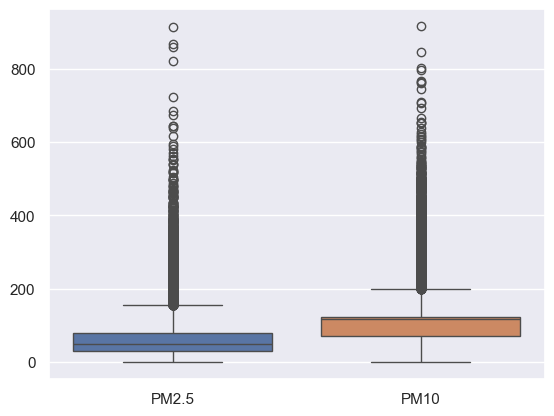

In [37]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

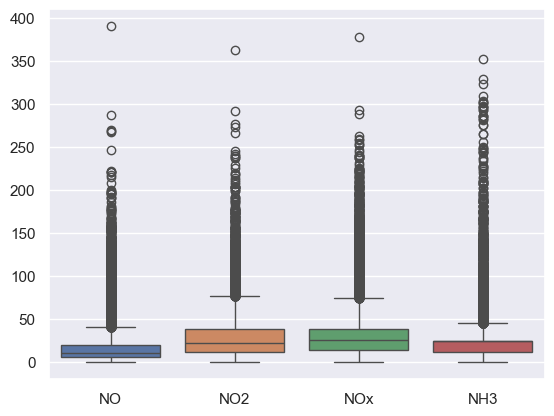

In [38]:
sns.boxplot(data=df[['NO', 'NO2', 'NOx', 'NH3']])

<Axes: >

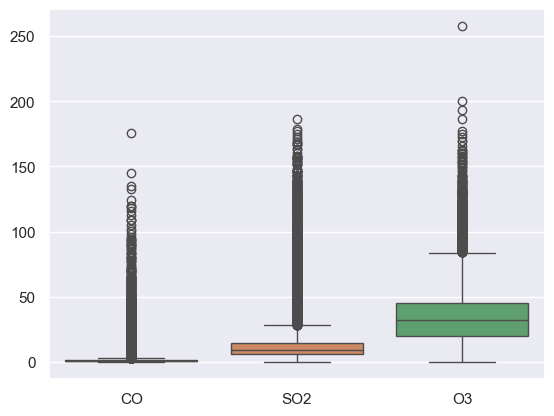

In [39]:
sns.boxplot(data=df[['CO', 'SO2', 'O3']])

<Axes: >

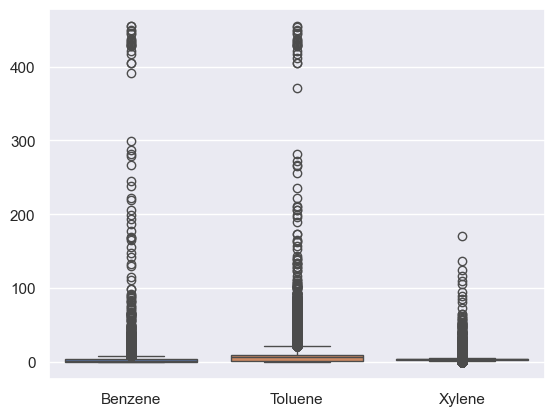

In [40]:
sns.boxplot(data=df[['Benzene', 'Toluene', 'Xylene']])

**DATA EDITING PROCEDURES**

- interquartile range (IQR)

In [41]:
def replace_outliers_with_quartiles(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3-Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].apply(
            lambda x:Q1 if x<lower_bound else (Q3 if x>upper_bound else x)
        )
    return df
df = replace_outliers_with_quartiles(df)

<Axes: >

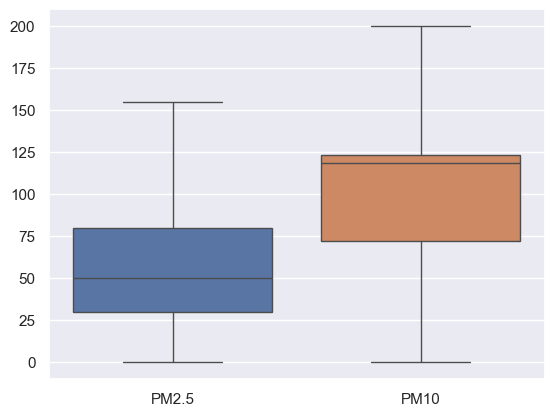

In [42]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

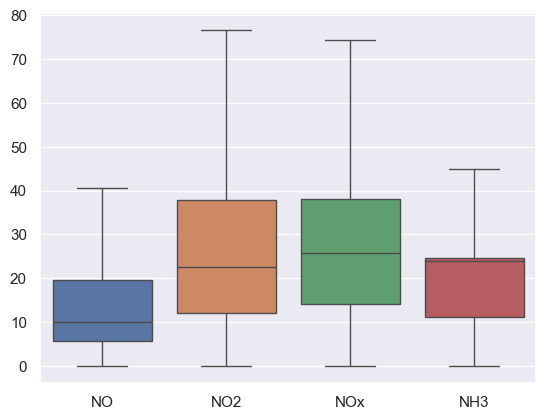

In [43]:
sns.boxplot(data=df[['NO', 'NO2', 'NOx', 'NH3']])

<Axes: >

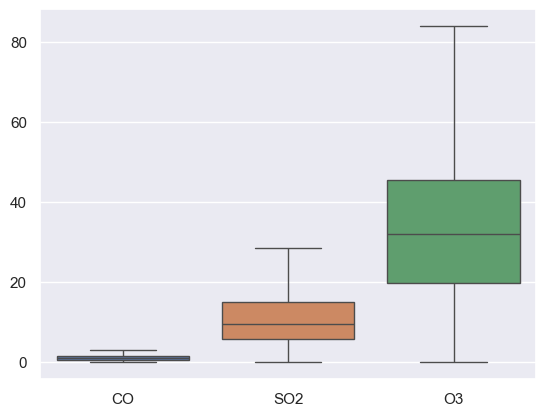

In [44]:
sns.boxplot(data=df[['CO', 'SO2', 'O3']])

<Axes: >

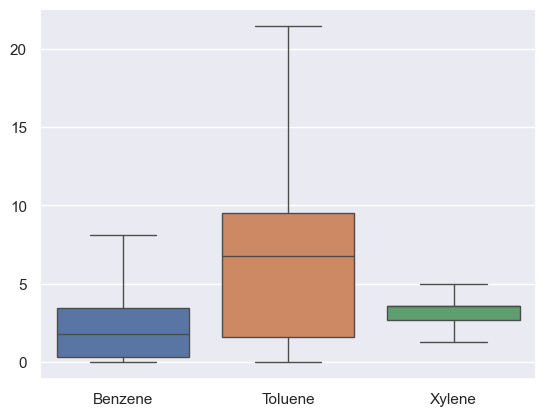

In [45]:
sns.boxplot(data=df[['Benzene', 'Toluene', 'Xylene']])

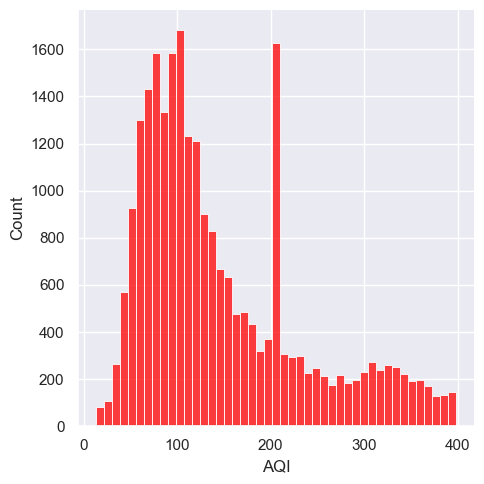

In [46]:
#distribution of aqi from 2012-2020
sns.displot(df, x='AQI', color='red')
plt.show()

In [47]:
df1 = df.drop(columns=['City'])

#### Multivariant analysis

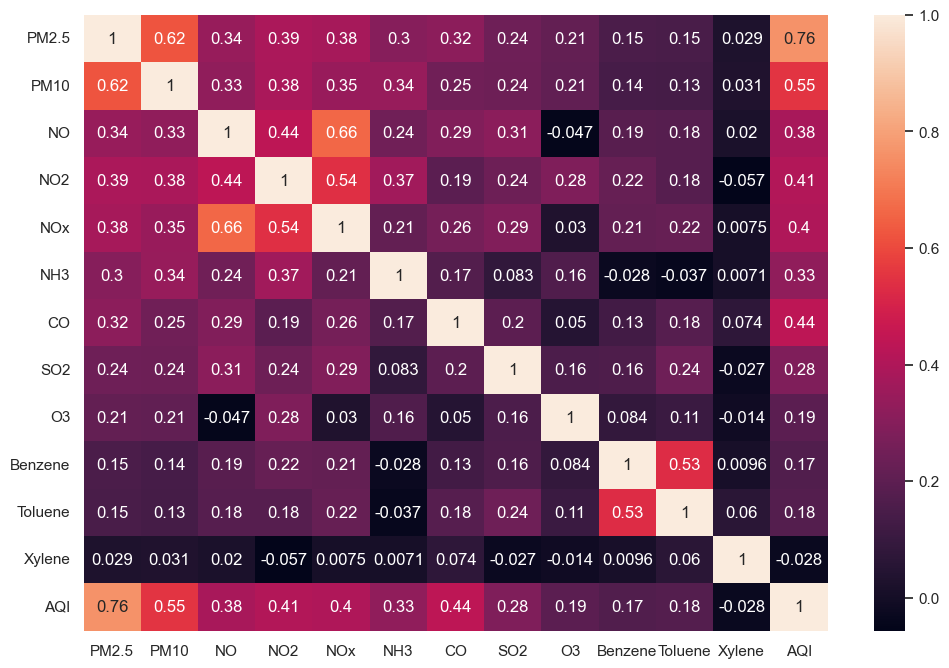

In [48]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True)
plt.show()

### Preparing the data

In [49]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.020000,0.000000,3.140000,209.0
29,Ahmedabad,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.040000,0.000000,4.810000,328.0
30,Ahmedabad,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.240000,0.010000,3.588683,208.0
31,Ahmedabad,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.400000,0.040000,3.588683,208.0
32,Ahmedabad,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.460000,0.060000,3.588683,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.0200,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.3000,2.240000,12.070000,2.650000,41.0
29527,Visakhapatnam,24.3800,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.1400,0.740000,2.210000,2.650000,70.0
29528,Visakhapatnam,22.9100,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.9600,0.010000,0.010000,2.650000,68.0
29529,Visakhapatnam,16.6400,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.3000,0.000000,0.000000,2.650000,54.0


In [50]:
df.drop(['City'], axis=1, inplace=True)

In [51]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.02,0.00,3.140000,209.0
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.04,0.00,4.810000,328.0
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.24,0.01,3.588683,208.0
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.40,0.04,3.588683,208.0
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.46,0.06,3.588683,208.0


#### Data Modeling

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

#### Data Preparation for Modeling

In [53]:
x = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene']]
y = df['AQI']

In [54]:
x.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.02,0.00,3.140000
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.04,0.00,4.810000
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.24,0.01,3.588683
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.40,0.04,3.588683
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.46,0.06,3.588683


In [55]:
y.head()

28    209.0
29    328.0
30    208.0
31    208.0
32    208.0
Name: AQI, dtype: float64

In [56]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(19880, 12) (4970, 12) (19880,) (4970,)


### Applying an appropriate Regression algorithm to build

#### Linear Regression

In [57]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [58]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [59]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print('RMSE TrainingData = ', str(RMSE_train))
print('RMSE TestData = ', str(RMSE_test))
print('-'*50)     
print('RSquared value of train: ', model.score(x_train, y_train))
print('RSquared value of test: ', model.score(x_test, y_test))   

RMSE TrainingData =  51.73162460795584
RMSE TestData =  50.88099317130839
--------------------------------------------------
RSquared value of train:  0.6510774205877974
RSquared value of test:  0.6562598886507953


#### K - Nearest Neighbors 

In [60]:
KNN = KNeighborsRegressor()
KNN.fit(x_train, y_train)

KNeighborsRegressor()

In [61]:
train_pred = KNN.predict(x_train)
test_pred = KNN.predict(x_test)

In [62]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print('RMSE TrainingData = ', str(RMSE_train))
print('RMSE TestData = ', str(RMSE_test))
print('-'*50)     
print('RSquared value of train: ', KNN.score(x_train, y_train))
print('RSquared value of test: ', KNN.score(x_test, y_test)) 

RMSE TrainingData =  35.45490921614595
RMSE TestData =  43.536087115032814
--------------------------------------------------
RSquared value of train:  0.8361035318957133
RSquared value of test:  0.7483378860374803


#### Decision Tree Regressor

In [63]:
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [64]:
train_pred = DT.predict(x_train)
test_pred = DT.predict(x_test)

In [65]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print('RMSE TrainingData = ', str(RMSE_train))
print('RMSE TestData = ', str(RMSE_test))
print('-'*50)     
print('RSquared value of train: ', DT.score(x_train, y_train))
print('RSquared value of test: ', DT.score(x_test, y_test)) 

RMSE TrainingData =  2.2684211563088263
RMSE TestData =  48.15400105433343
--------------------------------------------------
RSquared value of train:  0.9993290900734868
RSquared value of test:  0.6921183471988357


#### Random Forest Regressor

In [69]:
RF =  RandomForestRegressor()
RF.fit(x_train, y_train)

RandomForestRegressor()

In [70]:
train_pred = RF.predict(x_train)
test_pred = RF.predict(x_test)

In [71]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print('RMSE TrainingData = ', str(RMSE_train))
print('RMSE TestData = ', str(RMSE_test))
print('-'*50)     
print('RSquared value of train: ', RF.score(x_train, y_train))
print('RSquared value of test: ', RF.score(x_test, y_test)) 

RMSE TrainingData =  13.021860627337086
RMSE TestData =  34.16416003491234
--------------------------------------------------
RSquared value of train:  0.9778913143358657
RSquared value of test:  0.8450253912596405


### Conclusion & Future Work

- Strategies to reduce pollution should focus on traffic and industrial emissions
- Predictive models using machine learning can improve forecasting
- Real-time air quality monitoring integration for better decision-making